<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/1006_house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터분석코테/Data/house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#ID는 제외
df.drop(["Id"], axis =1 , inplace = True)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

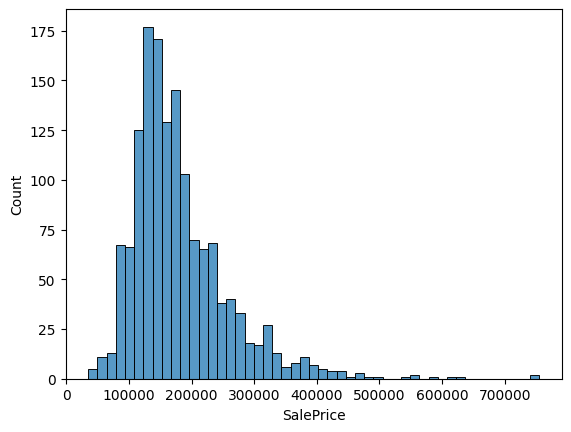

In [ ]:
#타겟 변수인 SalePrice의 분포 확인 : 정규 분포의 모습을 보인다, 하지만 분산이 큰 데이터임. 로그 변환 후 진행.
sns.histplot(df.SalePrice)

<Axes: >

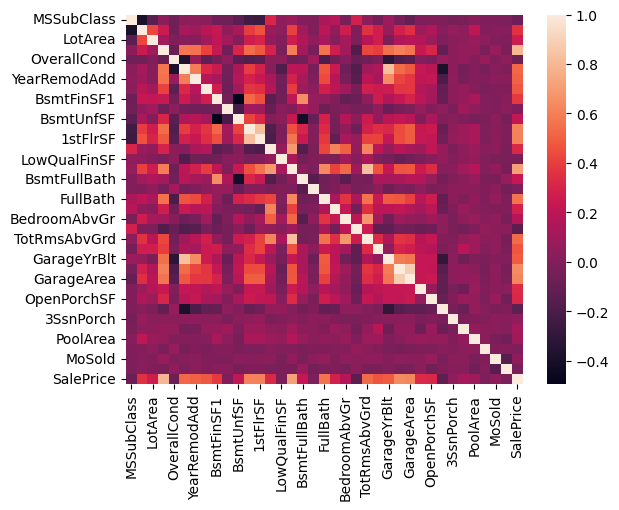

In [ ]:
#상관관계 확인
corr= df.corr()
sns.heatmap(corr)

In [ ]:
corr["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

0.79부터 0.2~3까지 y와 상관있는 변수가 많이 있음. 0.2 이하의 변수는 버려도 될 것 같음

In [20]:
cor_col =corr[abs(corr["SalePrice"])> 0.2].columns
#상관 계수의 절댓값이 0.2 이상인 변수들
cor_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
df = df[cor_col]
#상관 계수 기준으로 잘라낸 데이터프레임

#  결측치 처리

In [25]:
#결측치 확인
df.isnull().sum().sort_values(ascending= False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

LotFrontage, GarageYrBlt, MasVnrArea  3개의 변수에 결측치 존재함

<Axes: >

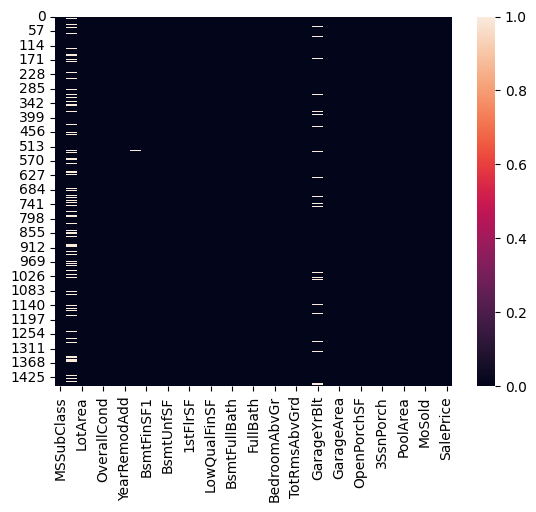

In [26]:
sns.heatmap(df.isnull())#결측치 시각적으로 확인

결측치 개수가 많지는 않으나 제거하지 않고 채워보도록 함.

<Figure size 2000x1000 with 0 Axes>

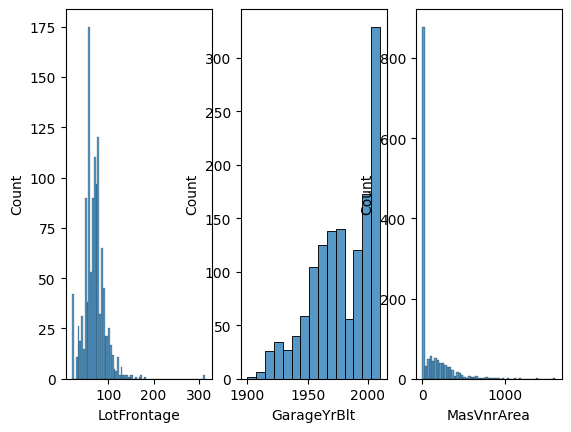

In [35]:
plt.figure(figsize = (20,10))
fig, ax = plt.subplots(ncols=3)
sns.histplot(df.LotFrontage, ax= ax[0])
sns.histplot(df.GarageYrBlt, ax= ax[1])
sns.histplot(df.MasVnrArea , ax= ax[2])
plt.show()

굉장히 한쪽으로 치우친 데이터: 단순 통계값으로 채우기는 어렵다고 판단됨

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

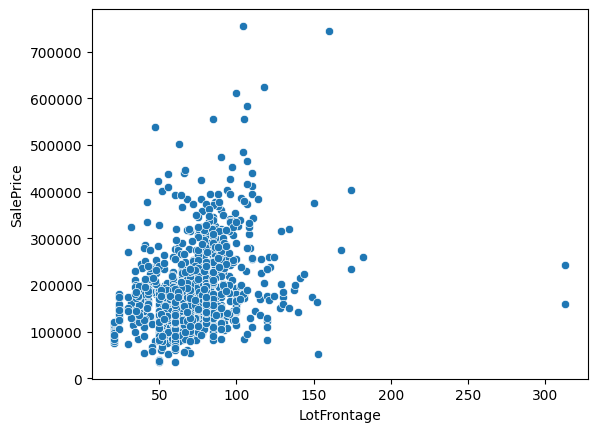

In [48]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

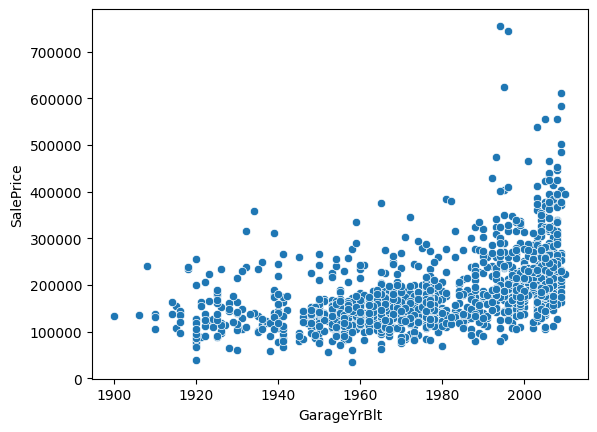

In [49]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

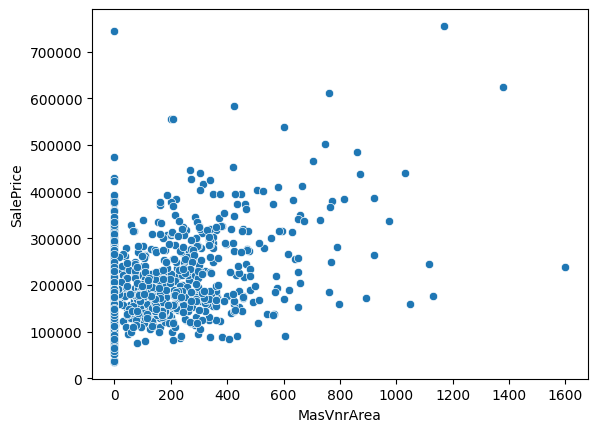

In [50]:

sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)

선형관계 확인 어려움

In [52]:
null_col =['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [53]:
#평균으로 채우기보다는 중위수로 채우기
for i in null_col:
  df[i] = df[i].fillna(df[i].median())

In [55]:
df.isnull().sum().sort_values(ascending=False)

MSSubClass       0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
LotFrontage      0
BsmtHalfBath     0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

결측치 다 채워졌음을 확인

# 인코딩

In [57]:
X =df.drop(["SalePrice"], axis = 1)
y =df[["SalePrice"]]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,  test_size = 0.8, random_state=42)

In [59]:
#인코딩
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

X_train_std = StandardScaler.fit_transform(X_train)
X_test_std = StandardScaler.transform(X_test)

# 모델링

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
# !pip install catboost
from catboost import CatBoostRegressor

In [62]:
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

In [ ]:
# !pip install scikit-optimize
from skopt import BayesSearchCV

In [64]:
from skopt.space import Real, Integer,Categorical

In [66]:
# 모델과 파라미터 그리드 설정
models = {
    'SVR': (SVR(), {
        'C': (0.1, 10.0, 'log-uniform'),
        'epsilon': (0.01, 0.1, 'uniform')
    }),
    'Lasso': (Lasso(), {
        'alpha': (0.01, 1.0, 'log-uniform')
    }),
    'Ridge': (Ridge(), {
        'alpha': (0.01, 1.0, 'log-uniform')
    }),
    'LightGBM': (LGBMRegressor(), {
        'boosting_type': ['gbdt', 'dart', 'goss'],
        'num_leaves': Integer(5, 20),
        'learning_rate': Real(0.01, 0.5),
        'n_estimators': Integer(100, 1000),
        'max_depth': Integer(3, 10)
    }),
    'CatBoost': (CatBoostRegressor(verbose=False), {
        'depth': Integer(4, 8),
        'learning_rate': Real(0.01, 0.5),
        'n_estimators': Categorical([100, 200, 300])
    })
}


In [67]:
# 각 모델에 대한 튜닝과 적합 결과 저장
model_results = []

# 각 모델에 대한 베이지안 그리드 서치 수행
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    bayes_search = BayesSearchCV(model, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
    bayes_search.fit(X_train_std, y_train)

    best_model = bayes_search.best_estimator_
    best_params = bayes_search.best_params_
    print(f"Best Parameters: {best_params}")

    y_pred = best_model.predict(X_test_std)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Mean Squared Error: {rmse}\n")

    # 모델 이름과 MSE 결과 저장
    model_results.append((model_name, rmse))


Training SVR...
Best Parameters: OrderedDict([('C', 2.934573970620662), ('epsilon', 0.038870326101577736)])
Mean Squared Error: 82897.95208496256

Training Lasso...
Best Parameters: OrderedDict([('alpha', 0.7988177952208354)])
Mean Squared Error: 39891.050392969

Training Ridge...
Best Parameters: OrderedDict([('alpha', 0.9458312377659663)])
Mean Squared Error: 39831.42621683633

Training LightGBM...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 30
[LightGBM] [Info] Start training from score 180278.472603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
model_results

[('SVR', 82867.68304963695),
 ('Lasso', 42399.40180051293),
 ('Ridge', 34453.67773338865),
 ('LightGBM', 34022.001888567174),
 ('CatBoost', 31765.098230265678)]

In [68]:
model_results

[('SVR', 82897.95208496256),
 ('Lasso', 39891.050392969),
 ('Ridge', 39831.42621683633),
 ('LightGBM', 33772.056382072245),
 ('CatBoost', 32428.040537405974)]

In [69]:
from sklearn.ensemble import VotingRegressor
# 선택할 모델 개수
num_selected_models = 2
# MSE를 기준으로 상위 2개의 모델 선택
selected_models = sorted(model_results, key=lambda x: x[1])[:num_selected_models]
# VotingRegressor를 위한 회귀 모델 리스트 생성
regressor_models = [(model_name, models[model_name][0]) for model_name, _ in selected_models]
# VotingRegressor 모델 생성
voting_regressor = VotingRegressor(estimators=regressor_models)
# VotingRegressor 모델 적합
voting_regressor.fit(X_train_std, y_train)
# 테스트 데이터에 대한 예측 및 평가
y_pred = voting_regressor.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 30
[LightGBM] [Info] Start training from score 180278.472603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

33433.02889264382

In [ ]:
rmse

32316.44658527529

voting 사용하지 않은 'CatBoost', 31765.098230265678 가 성능 제일 높음: 해당 모델 채택

셀프 느낀점: 분류 문제에서 클래스 불균형이 있는 데이터셋의 성능이 크게 안좋아지는 것처럼 회귀에서는 치우쳐져있는 데이터는 성능이 안좋아진다. 로그 변환 후 분석 진행하고, 끝에 다시 변환하여 성능을 확인하는 것이 좋을 것 같다.